In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
data, label = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 50)

In [3]:
data.shape, label.shape

((1000, 2), (1000,))

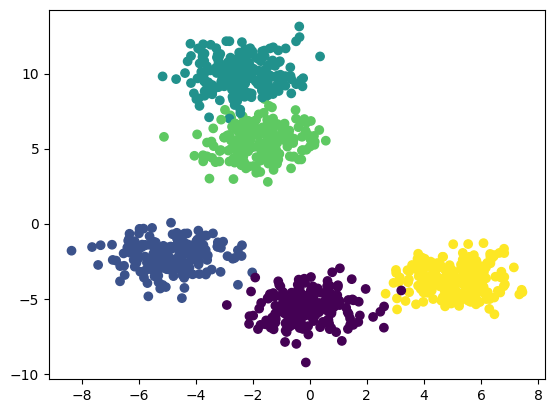

In [4]:
plt.scatter(data[:, 0], data[:, 1], c = label)

In [5]:
k = 5

In [6]:
color = ['Red', 'Blue', 'Green', 'Orange', 'Pink']

In [25]:
clusters = {}

for i in range(k):
    center = np.random.randint(-10, 10, 2)
    points = []
    
    cluster = {
        'center': center,
        'points': points,
        'color':color[i]
    }
    
    clusters[i] = cluster

In [26]:
clusters

{0: {'center': array([0, 9]), 'points': [], 'color': 'Red'},
 1: {'center': array([ -6, -10]), 'points': [], 'color': 'Blue'},
 2: {'center': array([ 7, -8]), 'points': [], 'color': 'Green'},
 3: {'center': array([-9, -7]), 'points': [], 'color': 'Orange'},
 4: {'center': array([-5,  5]), 'points': [], 'color': 'Pink'}}

In [27]:
def eucledian_distance(p1, p2):
    dist = ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5
    return dist

In [28]:
def assign_points(clusters):
    
    for i in range(data.shape[0]):
        dist = []
        for j in range(k):
            dist.append(eucledian_distance(data[i], clusters[j]['center']))
        
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(data[i])

In [29]:
def update_centroid(clusters):
    
    for i in range(k):
        p = np.array(clusters[i]['points'])
        if p.shape[0]>0:
            mean = np.mean(p, axis = 0)

            clusters[i]['center'] = mean
            clusters[i]['points'] = []

In [30]:
def plot_steps(clusters):
    
    for i in range(k):
        p = np.array(clusters[i]['points'])
        try:
            plt.scatter(p[:, 0], p[:, 1], c = clusters[i]['color'], marker = '.')
        except:
            pass
        plt.scatter(clusters[i]['center'][0], clusters[i]['center'][1], c = 'Black', marker = '^')

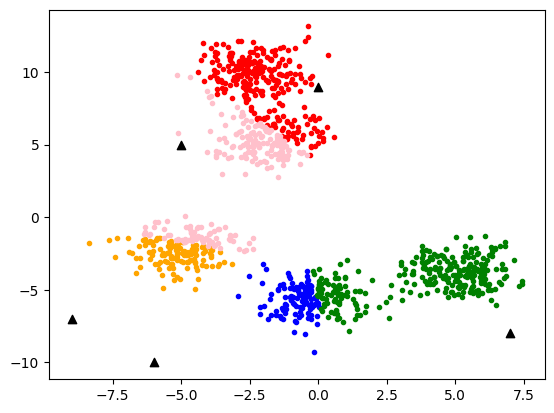

In [31]:
assign_points(clusters)
plot_steps(clusters)

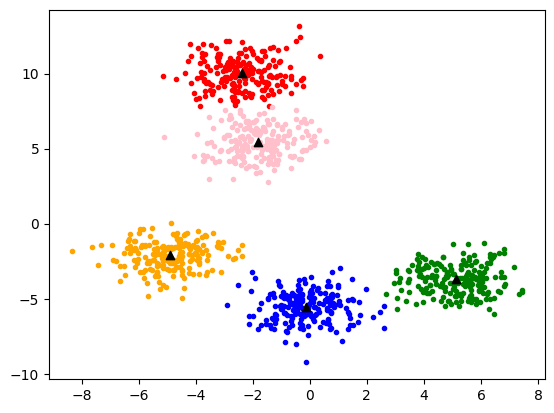

In [41]:
assign_points(clusters)
plot_steps(clusters)
update_centroid(clusters)